In [ ]:
# !git clone https://github.com/finterstellar/finterstellar.git

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.1.3

In [ ]:
# !pip uninstall scikit-learn

In [ ]:
# !pip install scikit-learn==0.23.2

In [ ]:
# !pip install -U finance-datareader
# !pip install yfinance

In [ ]:
# !pip install pycaret[full] -qqq

In [ ]:
# !pip install finterstellar

In [ ]:
# ta library
# https://technical-analysis-library-in-python.readthedocs.io/en/latest/

# !pip install ta

In [ ]:
from sklearn.cluster import KMeans
import warnings, random
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import StandardScaler

# 데이터 준비

In [ ]:
import FinanceDataReader as fdr

korean_list = fdr.StockListing('Krx')
korean_list

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"박대현, 손삼달",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7926,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7927,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7928,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시
7929,419890,KOSPI,히어로즈 단기채권ESG액티브,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [ ]:
print(korean_list.loc[korean_list['Name'] == 'POSCO홀딩스'])

      Symbol Market      Name     Sector                  Industry  \
1793  005490  KOSPI  POSCO홀딩스  1차 철강 제조업  열연코일,냉연강판,후판,선재,스테인리스 제조   

     ListingDate SettleMonth            Representative  \
1793  1988-06-10         12월  대표이사 회장 최정우, 대표이사 사장 전중선   

                    HomePage Region  
1793  http://www.posco.co.kr  서울특별시  


In [ ]:
import yfinance as yf
# 신한지주 = 055550  
List= yf.download('055550.KS',
                      start='2018-06-01',
                       end = '2022-01-10',
                       action='inline',
                      progress=False)

In [ ]:
data = List

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,44100.0,44550.0,43900.0,44300.0,37051.121094,601472
2018-06-04,44400.0,45500.0,44300.0,45500.0,38054.757812,913880
2018-06-05,45450.0,45850.0,44600.0,45850.0,38347.484375,852324
2018-06-07,46500.0,47250.0,46400.0,47150.0,39434.769531,1235685
2018-06-08,47250.0,47600.0,46800.0,47450.0,39685.683594,895209
...,...,...,...,...,...,...
2022-01-04,37300.0,37600.0,37200.0,37600.0,37600.000000,1128934
2022-01-05,37800.0,37950.0,37300.0,37500.0,37500.000000,1473096
2022-01-06,37650.0,37850.0,37150.0,37300.0,37300.000000,1232985


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2018-06-01 to 2022-01-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       889 non-null    float64
 1   High       889 non-null    float64
 2   Low        889 non-null    float64
 3   Close      889 non-null    float64
 4   Adj Close  889 non-null    float64
 5   Volume     889 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 48.6 KB


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,44100.0,44550.0,43900.0,44300.0,37051.121094,601472
2018-06-04,44400.0,45500.0,44300.0,45500.0,38054.757812,913880
2018-06-05,45450.0,45850.0,44600.0,45850.0,38347.484375,852324
2018-06-07,46500.0,47250.0,46400.0,47150.0,39434.769531,1235685
2018-06-08,47250.0,47600.0,46800.0,47450.0,39685.683594,895209


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-04,37300.0,37600.0,37200.0,37600.0,37600.0,1128934
2022-01-05,37800.0,37950.0,37300.0,37500.0,37500.0,1473096
2022-01-06,37650.0,37850.0,37150.0,37300.0,37300.0,1232985
2022-01-07,37300.0,37650.0,36900.0,37650.0,37650.0,1126929
2022-01-10,37800.0,38600.0,37700.0,38550.0,38550.0,2619613


In [ ]:
# Close(종가)는 삭제하고 Adj Close(수정된 종가)를 사용
data.drop(columns = ['Close'], inplace = True)
data.rename(columns = {'Adj Close' : 'Close'}, inplace = True)
# chage(변화량), chage_rate(변화율) 추가
# 변화량
data['Change'] = [data.iloc[i]['Close']-data.iloc[i-1]['Close'] for i in range(len(data))]
# 변화율
data['Change_rate'] = [(data.iloc[i]['Close']-data.iloc[i-1]['Close'])/data.iloc[i-1]['Close']*100 for i in range(len(data))]
data

,Open,High,Low,Close,Volume,Change,Change_rate
Date,,,,,,,
2018-06-01,44100.0,44550.0,43900.0,37051.121094,601472,-1498.878906,-3.888142
2018-06-04,44400.0,45500.0,44300.0,38054.757812,913880,1003.636719,2.708789
2018-06-05,45450.0,45850.0,44600.0,38347.484375,852324,292.726562,0.769225
2018-06-07,46500.0,47250.0,46400.0,39434.769531,1235685,1087.285156,2.835349
2018-06-08,47250.0,47600.0,46800.0,39685.683594,895209,250.914062,0.636276
...,...,...,...,...,...,...,...
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957
2022-01-06,37650.0,37850.0,37150.0,37300.000000,1232985,-200.000000,-0.533333


## 각종지수 feature로 추가

In [ ]:
import pandas as pd
import numpy as np
import ta

### 볼린저 밴드

In [ ]:
# 하이밴드
# ta.volatility.bollinger_hband(close, window=20, window_dev=2, fillna=False)
data['boll_HB'] = ta.volatility.bollinger_hband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_HB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# 로우밴드
# ta.volatility.bollinger_lband(close, window=20, window_dev=2, fillna=False)
data['boll_LB'] = ta.volatility.bollinger_lband(data['Close'], window=20, window_dev=2, fillna=False)

In [ ]:
# ta.volatility.bollinger_hband_indicator(close, window=20, window_dev=2, fillna=False)
data['boll_LB_signal'] = ta.volatility.bollinger_hband_indicator(data['Close'], window=20, window_dev=2, fillna=False)

### RSI

In [ ]:
# ta.momentum.rsi(close, window=14, fillna=False) → pandas.core.series.Series
data['rsi'] = ta.momentum.rsi(data['Close'])

In [ ]:
data['rsi']

Date
2018-06-01          NaN
2018-06-04          NaN
2018-06-05          NaN
2018-06-07          NaN
2018-06-08          NaN
                ...    
2022-01-04    62.926371
2022-01-05    61.562441
2022-01-06    58.816609
2022-01-07    62.009987
2022-01-10    68.725482
Name: rsi, Length: 889, dtype: float64

In [ ]:
# 30 이하 1 70이상 -1 그 외 0
def make_rissignal(value):
    if value <= 30: 
        return 1
    elif value <= 70:
        return 0
    else:
        return -1


In [ ]:
data['rsi_signal'] = data['rsi'].apply(lambda x : make_rissignal(x))

### 단순이동 평균

In [ ]:
# 단순 이동평균 SMA (Simple Moving Average)
data['sma5'] = data['Close'].rolling(5).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma60'] = data['Close'].rolling(60).mean()
data['sma120'] = data['Close'].rolling(120).mean()

### WMA 가중평균

In [ ]:
# WMA 가중평균
# ta.trend.wma_indicator(close, window=9, fillna=False)
data['WMA'] = ta.trend.wma_indicator(data['Close'], window=9, fillna=False)

### EMV 단순이동

In [ ]:
# EMV 단순이동
# ta.volume.ease_of_movement(high, low, volume, window=14, fillna=False)
data['EMV'] = ta.volume.ease_of_movement(data['High'], data['Low'], data['Volume'], window=14, fillna=False)

### macd

In [ ]:
# macd
# macd = ta.trend.macd(close) 12일 지수이동평균 - 26일 지수이동평균
# macdsignal = ta.trend.macd_signal(close) MACD의 9일 지수이동평균
# ta.trend.MACD(close: pandas.core.series.Series, 
# window_slow: int = 26, window_fast: int = 12, window_sign: int = 9, fillna: bool = False)
data['macd'] = ta.trend.macd(data['Close'])
data['macdsignal'] = ta.trend.macd_signal(data['Close'])

### 모멘텀

In [ ]:
# 모멘텀 awesome_oscillator
# ta.momentum.AwesomeOscillatorIndicator(high: pandas.core.series.Series, low: pandas.core.series.Series, window1: int = 5, window2: int = 34, fillna: bool = False)
data['awesome_oscillator'] = ta.momentum.awesome_oscillator(data['High'], data['Low'], 5, 34, False )

### williams_r

In [ ]:
# williams_r
# ta.momentum.williams_r(high, low, close, lbp=14, fillna=False)
data['williams_r'] = ta.momentum.williams_r(data['High'], data['Low'], data['Close'], lbp=14, fillna=False)

## 타겟설정

In [ ]:
# 등락률 : 어제보다 올랐으면 1 그밖은 0
data['upNdown']=[1 if x>0 else 0 for x in data['Change']]
#하루전 등락
data['upNdown_1ago']=data['upNdown'].shift(1)
#이틀전 등락
data['upNdown_2ago']=data['upNdown'].shift(2)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,sma120,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,44100.0,44550.0,43900.0,37051.121094,601472,-1498.878906,-3.888142,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2018-06-04,44400.0,45500.0,44300.0,38054.757812,913880,1003.636719,2.708789,NaN,0.0,NaN,...,NaN,NaN,8.863308e+07,NaN,NaN,NaN,NaN,1,0.0,NaN
2018-06-05,45450.0,45850.0,44600.0,38347.484375,852324,292.726562,0.769225,NaN,0.0,NaN,...,NaN,NaN,4.766380e+07,NaN,NaN,NaN,NaN,1,1.0,0.0
2018-06-07,46500.0,47250.0,46400.0,39434.769531,1235685,1087.285156,2.835349,NaN,0.0,NaN,...,NaN,NaN,1.100604e+08,NaN,NaN,NaN,NaN,1,1.0,1.0
2018-06-08,47250.0,47600.0,46800.0,39685.683594,895209,250.914062,0.636276,NaN,0.0,NaN,...,NaN,NaN,3.351173e+07,NaN,NaN,NaN,NaN,1,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,36882.482487,36932.527517,1.328687e+07,287.018866,148.860825,188.676471,-38.095238,1,0.0,1.0
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,36890.316895,37073.934375,9.928070e+06,327.454198,184.579500,141.764706,-50.000000,0,1.0,0.0
2022-01-06,37650.0,37850.0,37150.0,37300.000000,1232985,-200.000000,-0.533333,37650.702432,0.0,35478.515927,...,36888.907878,37152.252517,-7.096599e+06,339.448214,215.553243,65.588235,-61.111111,0,0.0,1.0


In [ ]:
# 내일의 등락률 즉 내일 예측을 위해 하루를 땅김
data['Target']=data['upNdown'].shift(-1)

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-01,44100.0,44550.0,43900.0,37051.121094,601472,-1498.878906,-3.888142,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1.0
2018-06-04,44400.0,45500.0,44300.0,38054.757812,913880,1003.636719,2.708789,NaN,0.0,NaN,...,NaN,8.863308e+07,NaN,NaN,NaN,NaN,1,0.0,NaN,1.0
2018-06-05,45450.0,45850.0,44600.0,38347.484375,852324,292.726562,0.769225,NaN,0.0,NaN,...,NaN,4.766380e+07,NaN,NaN,NaN,NaN,1,1.0,0.0,1.0
2018-06-07,46500.0,47250.0,46400.0,39434.769531,1235685,1087.285156,2.835349,NaN,0.0,NaN,...,NaN,1.100604e+08,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0
2018-06-08,47250.0,47600.0,46800.0,39685.683594,895209,250.914062,0.636276,NaN,0.0,NaN,...,NaN,3.351173e+07,NaN,NaN,NaN,NaN,1,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,36932.527517,1.328687e+07,287.018866,148.860825,188.676471,-38.095238,1,0.0,1.0,0.0
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,37073.934375,9.928070e+06,327.454198,184.579500,141.764706,-50.000000,0,1.0,0.0,0.0
2022-01-06,37650.0,37850.0,37150.0,37300.000000,1232985,-200.000000,-0.533333,37650.702432,0.0,35478.515927,...,37152.252517,-7.096599e+06,339.448214,215.553243,65.588235,-61.111111,0,0.0,1.0,1.0


In [ ]:
# data=data.drop('upNdown',axis=1)
data = data.dropna()

In [ ]:
data=data[22:]

In [ ]:
data

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,WMA,EMV,macd,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,34228.852083,8.827808e+06,-309.458863,-407.883536,-1226.029412,-262.200142,1,1.0,0.0,0.0
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,34250.390191,4.677363e+07,-278.595052,-382.025839,-1377.352941,-268.534091,0,1.0,1.0,0.0
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,34210.768750,-3.670827e+07,-272.082703,-360.037212,-1658.970588,-273.070592,0,0.0,1.0,0.0
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,34157.138455,-1.691426e+07,-270.827428,-342.195255,-1842.941176,-253.543289,0,0.0,0.0,0.0
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,34066.234983,-2.521008e+06,-284.127033,-330.581611,-1777.500000,-260.682249,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,36746.880035,3.443668e+06,221.052040,114.321315,297.058824,-76.190476,0,1.0,1.0,1.0
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,36932.527517,1.328687e+07,287.018866,148.860825,188.676471,-38.095238,1,0.0,1.0,0.0
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,37073.934375,9.928070e+06,327.454198,184.579500,141.764706,-50.000000,0,1.0,0.0,0.0


## 클러스터링

In [ ]:
kmeans_data = data.drop(['upNdown','upNdown_1ago','upNdown_2ago',	'Target'], axis=1)
kmeans = KMeans(n_clusters=8, random_state=42).fit(kmeans_data)
data['cluster'] = kmeans.predict(kmeans_data)


# pycaret

In [ ]:
from pycaret.classification import * 

In [ ]:
# Importing module and initializing setup 

clf = setup(data = data, target='Target', train_size=0.8, silent=True, use_gpu =True)

,Description,Value
0,session_id,7877
1,Target,Target
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(745, 28)"
5,Missing Values,False
6,Numeric Features,21
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# return best model based on AUC 
best = compare_models() #default is 'Accuracy' 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5637,0.5716,0.5365,0.5485,0.5415,0.1254,0.1258,0.165
et,Extra Trees Classifier,0.5570,0.5608,0.5504,0.5376,0.5428,0.1134,0.1138,0.807
lightgbm,Light Gradient Boosting Machine,0.5500,0.5459,0.5326,0.5381,0.5329,0.0990,0.0996,0.078
dt,Decision Tree Classifier,0.5468,0.5468,0.5469,0.5362,0.5385,0.0940,0.0950,0.017
catboost,CatBoost Classifier,0.5434,0.5457,0.5294,0.5284,0.5282,0.0861,0.0865,2.603
rf,Random Forest Classifier,0.5416,0.5383,0.4978,0.5228,0.5088,0.0799,0.0799,0.801
xgboost,Extreme Gradient Boosting,0.5318,0.5387,0.5055,0.5142,0.5069,0.0620,0.0627,0.261
ridge,Ridge Classifier,0.5252,0.0000,0.4771,0.5092,0.4910,0.0469,0.0474,0.015
qda,Quadratic Discriminant Analysis,0.5252,0.5222,0.6474,0.5045,0.5636,0.0579,0.0633,0.011
lda,Linear Discriminant Analysis,0.5251,0.5284,0.4771,0.5090,0.4910,0.0469,0.0474,0.019


In [ ]:
#xgboost, lightgbm, catboost

## m1

In [ ]:
m1 = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6167,0.6318,0.6552,0.5938,0.6230,0.2350,0.2362
1,0.5667,0.5467,0.4828,0.5600,0.5185,0.1285,0.1297
2,0.5000,0.5078,0.5517,0.4848,0.5161,0.0033,0.0034
3,0.5833,0.5990,0.5172,0.5769,0.5455,0.1629,0.1638
4,0.5167,0.5929,0.4483,0.5000,0.4727,0.0290,0.0292
5,0.6500,0.6613,0.6207,0.6429,0.6316,0.2984,0.2986
6,0.5593,0.5213,0.5357,0.5357,0.5357,0.1164,0.1164
7,0.4746,0.4770,0.4286,0.4444,0.4364,-0.0554,-0.0554
8,0.6441,0.6526,0.6071,0.6296,0.6182,0.2851,0.2852


In [ ]:
tuned_m1 = tune_model(m1,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6500,0.6285,0.5172,0.6818,0.5882,0.2937,0.3022
1,0.5500,0.4894,0.4138,0.5455,0.4706,0.0919,0.0946
2,0.4500,0.4800,0.3793,0.4231,0.4000,-0.1049,-0.1054
3,0.5167,0.4839,0.3448,0.5000,0.4082,0.0225,0.0236
4,0.6667,0.7875,0.4828,0.7368,0.5833,0.3251,0.3453
5,0.5167,0.5389,0.3103,0.5000,0.3830,0.0203,0.0218
6,0.6102,0.5997,0.5000,0.6087,0.5490,0.2115,0.2147
7,0.5932,0.5685,0.5000,0.5833,0.5385,0.1787,0.1804
8,0.6271,0.5853,0.5000,0.6364,0.5600,0.2445,0.2498


In [ ]:
predict_model(tuned_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.4966,0.5059,0.4051,0.5333,0.4604,0.005,0.0052


,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma5,sma20,...,boll_LB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,39700.0,35534.636719,1618419.0,958.042969,2.770785,35108.164062,33107.636719,61.226933,34080.152344,34107.902344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.6154
1,45150.0,39671.632812,412782.0,-130.644531,-0.328234,41127.070312,36321.878906,64.162811,39793.566406,38724.476562,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.6923
2,40600.0,39005.535156,1512128.0,-142.531250,-0.364082,41163.265625,34163.507812,60.837120,39376.113281,37663.386719,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.7308
3,38000.0,34944.515625,1326970.0,317.679688,0.917438,38581.074219,34430.265625,33.737930,35371.109375,36505.671875,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5769
4,38650.0,37469.082031,1345832.0,669.941406,1.820535,38045.414062,35758.628906,54.041309,36980.980469,36902.023438,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,30050.0,27274.873047,1488251.0,0.000000,0.000000,28022.666016,24276.107422,56.566624,27293.025391,26149.386719,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5769
145,44850.0,39105.515625,1183433.0,-87.093750,-0.222220,41103.828125,38282.984375,45.964909,39497.441406,39693.406250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.7692
146,26250.0,24098.099609,1925601.0,-181.527344,-0.747653,29125.427734,19769.660156,41.555077,24715.300781,24447.542969,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.7308
147,39300.0,37660.496094,1499688.0,143.562500,0.382661,38254.441406,35870.218750,52.311222,37382.945312,37062.328125,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5385


In [ ]:
final_m1 = finalize_model(tuned_m1)
print(final_m1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=26, p=2,
                     weights='uniform')


In [ ]:
predict_model(final_m1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5302,0.573,0.4304,0.5763,0.4928,0.0721,0.0747


,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma5,sma20,...,boll_LB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,39700.0,35534.636719,1618419.0,958.042969,2.770785,35108.164062,33107.636719,61.226933,34080.152344,34107.902344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.7308
1,45150.0,39671.632812,412782.0,-130.644531,-0.328234,41127.070312,36321.878906,64.162811,39793.566406,38724.476562,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.6154
2,40600.0,39005.535156,1512128.0,-142.531250,-0.364082,41163.265625,34163.507812,60.837120,39376.113281,37663.386719,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.6154
3,38000.0,34944.515625,1326970.0,317.679688,0.917438,38581.074219,34430.265625,33.737930,35371.109375,36505.671875,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.5385
4,38650.0,37469.082031,1345832.0,669.941406,1.820535,38045.414062,35758.628906,54.041309,36980.980469,36902.023438,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.6154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,30050.0,27274.873047,1488251.0,0.000000,0.000000,28022.666016,24276.107422,56.566624,27293.025391,26149.386719,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5769
145,44850.0,39105.515625,1183433.0,-87.093750,-0.222220,41103.828125,38282.984375,45.964909,39497.441406,39693.406250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.5769
146,26250.0,24098.099609,1925601.0,-181.527344,-0.747653,29125.427734,19769.660156,41.555077,24715.300781,24447.542969,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.6538
147,39300.0,37660.496094,1499688.0,143.562500,0.382661,38254.441406,35870.218750,52.311222,37382.945312,37062.328125,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5385


In [ ]:
m1_predictions = predict_model(final_m1, data=data)
m1_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6081,0.6534,0.4973,0.6276,0.5549,0.2131,0.2177


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,-407.883536,-1226.029412,-262.200142,1,1.0,0.0,0.0,0,0.0,0.6154
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,-382.025839,-1377.352941,-268.534091,0,1.0,1.0,0.0,4,0.0,0.6538
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,-360.037212,-1658.970588,-273.070592,0,0.0,1.0,0.0,2,0.0,0.5000
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,-342.195255,-1842.941176,-253.543289,0,0.0,0.0,0.0,2,0.0,0.5769
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,-330.581611,-1777.500000,-260.682249,0,0.0,0.0,0.0,5,0.0,0.6154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,114.321315,297.058824,-76.190476,0,1.0,1.0,1.0,0,1.0,0.5385
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,148.860825,188.676471,-38.095238,1,0.0,1.0,0.0,0,0.0,0.5000
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,184.579500,141.764706,-50.000000,0,1.0,0.0,0.0,0,0.0,0.5385


## m2

In [ ]:
m2 = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5667,0.6040,0.5517,0.5517,0.5517,0.1324,0.1324
1,0.4833,0.4116,0.3793,0.4583,0.4151,-0.0403,-0.0408
2,0.6000,0.5968,0.6207,0.5806,0.6000,0.2009,0.2013
3,0.6833,0.6919,0.7241,0.6562,0.6885,0.3681,0.3699
4,0.6000,0.6179,0.6207,0.5806,0.6000,0.2009,0.2013
5,0.4500,0.4694,0.4483,0.4333,0.4407,-0.1000,-0.1001
6,0.5254,0.4983,0.5714,0.5000,0.5333,0.0549,0.0554
7,0.5763,0.5680,0.5000,0.5600,0.5283,0.1459,0.1467
8,0.5085,0.5593,0.5357,0.4839,0.5085,0.0195,0.0196


In [ ]:
tuned_m2 = tune_model(m2,choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5833,0.5873,0.5517,0.5714,0.5614,0.1648,0.1649
1,0.4667,0.4171,0.4138,0.4444,0.4286,-0.0702,-0.0704
2,0.6500,0.6518,0.6897,0.6250,0.6557,0.3016,0.3031
3,0.5833,0.6118,0.6207,0.5625,0.5902,0.1685,0.1694
4,0.6500,0.6674,0.5517,0.6667,0.6038,0.2953,0.2995
5,0.4667,0.4416,0.5517,0.4571,0.5000,-0.0608,-0.0620
6,0.4915,0.4839,0.5000,0.4667,0.4828,-0.0161,-0.0161
7,0.5254,0.5507,0.5000,0.5000,0.5000,0.0484,0.0484
8,0.5763,0.5853,0.5714,0.5517,0.5614,0.1518,0.1519


In [ ]:
predict_model(tuned_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.4966,0.4748,0.443,0.5303,0.4828,0.0002,0.0002


,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma5,sma20,...,boll_LB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,39700.0,35534.636719,1618419.0,958.042969,2.770785,35108.164062,33107.636719,61.226933,34080.152344,34107.902344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.81
1,45150.0,39671.632812,412782.0,-130.644531,-0.328234,41127.070312,36321.878906,64.162811,39793.566406,38724.476562,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.60
2,40600.0,39005.535156,1512128.0,-142.531250,-0.364082,41163.265625,34163.507812,60.837120,39376.113281,37663.386719,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.50
3,38000.0,34944.515625,1326970.0,317.679688,0.917438,38581.074219,34430.265625,33.737930,35371.109375,36505.671875,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.58
4,38650.0,37469.082031,1345832.0,669.941406,1.820535,38045.414062,35758.628906,54.041309,36980.980469,36902.023438,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,30050.0,27274.873047,1488251.0,0.000000,0.000000,28022.666016,24276.107422,56.566624,27293.025391,26149.386719,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.65
145,44850.0,39105.515625,1183433.0,-87.093750,-0.222220,41103.828125,38282.984375,45.964909,39497.441406,39693.406250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.70
146,26250.0,24098.099609,1925601.0,-181.527344,-0.747653,29125.427734,19769.660156,41.555077,24715.300781,24447.542969,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.77
147,39300.0,37660.496094,1499688.0,143.562500,0.382661,38254.441406,35870.218750,52.311222,37382.945312,37062.328125,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.81


In [ ]:
final_m2 = finalize_model(tuned_m2)
print(final_m2)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=7877, verbose=0,
                     warm_start=False)


In [ ]:
predict_model(final_m2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma5,sma20,...,boll_LB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,39700.0,35534.636719,1618419.0,958.042969,2.770785,35108.164062,33107.636719,61.226933,34080.152344,34107.902344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1,45150.0,39671.632812,412782.0,-130.644531,-0.328234,41127.070312,36321.878906,64.162811,39793.566406,38724.476562,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,40600.0,39005.535156,1512128.0,-142.531250,-0.364082,41163.265625,34163.507812,60.837120,39376.113281,37663.386719,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,38000.0,34944.515625,1326970.0,317.679688,0.917438,38581.074219,34430.265625,33.737930,35371.109375,36505.671875,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,38650.0,37469.082031,1345832.0,669.941406,1.820535,38045.414062,35758.628906,54.041309,36980.980469,36902.023438,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,30050.0,27274.873047,1488251.0,0.000000,0.000000,28022.666016,24276.107422,56.566624,27293.025391,26149.386719,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
145,44850.0,39105.515625,1183433.0,-87.093750,-0.222220,41103.828125,38282.984375,45.964909,39497.441406,39693.406250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
146,26250.0,24098.099609,1925601.0,-181.527344,-0.747653,29125.427734,19769.660156,41.555077,24715.300781,24447.542969,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
147,39300.0,37660.496094,1499688.0,143.562500,0.382661,38254.441406,35870.218750,52.311222,37382.945312,37062.328125,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
m2_predictions = predict_model(final_m2, data=data)
m2_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,-407.883536,-1226.029412,-262.200142,1,1.0,0.0,0.0,0,0.0,1.0
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,-382.025839,-1377.352941,-268.534091,0,1.0,1.0,0.0,4,0.0,1.0
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,-360.037212,-1658.970588,-273.070592,0,0.0,1.0,0.0,2,0.0,1.0
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,-342.195255,-1842.941176,-253.543289,0,0.0,0.0,0.0,2,0.0,1.0
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,-330.581611,-1777.500000,-260.682249,0,0.0,0.0,0.0,5,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,114.321315,297.058824,-76.190476,0,1.0,1.0,1.0,0,1.0,1.0
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,148.860825,188.676471,-38.095238,1,0.0,1.0,0.0,0,0.0,1.0
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,184.579500,141.764706,-50.000000,0,1.0,0.0,0.0,0,0.0,1.0


## m3

In [ ]:
m3 = create_model('lightgbm' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6500,0.7308,0.5862,0.6538,0.6182,0.2969,0.2984
1,0.5500,0.5150,0.4138,0.5455,0.4706,0.0919,0.0946
2,0.6167,0.5962,0.5517,0.6154,0.5818,0.2299,0.2311
3,0.6000,0.6018,0.6207,0.5806,0.6000,0.2009,0.2013
4,0.6167,0.6240,0.5517,0.6154,0.5818,0.2299,0.2311
5,0.4833,0.4116,0.5862,0.4722,0.5231,-0.0265,-0.0272
6,0.4237,0.4113,0.4286,0.4000,0.4138,-0.1515,-0.1519
7,0.5424,0.5207,0.5714,0.5161,0.5424,0.0871,0.0876
8,0.5085,0.5265,0.4643,0.4815,0.4727,0.0127,0.0127


In [ ]:
tuned_m3 = tune_model(m3,choose_better = True , fold = 5 )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5583,0.5742,0.5172,0.5455,0.5310,0.1142,0.1143
1,0.5294,0.5758,0.4912,0.5091,0.5000,0.0558,0.0559
2,0.5798,0.5821,0.5088,0.5686,0.5370,0.1546,0.1554
3,0.4790,0.4898,0.4211,0.4528,0.4364,-0.0468,-0.0469
4,0.5294,0.5582,0.5862,0.5152,0.5484,0.0614,0.0620
Mean,0.5352,0.5560,0.5049,0.5182,0.5106,0.0678,0.0681
Std,0.0339,0.0340,0.0529,0.0391,0.0404,0.0678,0.0681


In [ ]:
predict_model(tuned_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.4832,0.5269,0.4304,0.5152,0.469,-0.0265,-0.0269


,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma5,sma20,...,boll_LB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,39700.0,35534.636719,1618419.0,958.042969,2.770785,35108.164062,33107.636719,61.226933,34080.152344,34107.902344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.5670
1,45150.0,39671.632812,412782.0,-130.644531,-0.328234,41127.070312,36321.878906,64.162811,39793.566406,38724.476562,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.7752
2,40600.0,39005.535156,1512128.0,-142.531250,-0.364082,41163.265625,34163.507812,60.837120,39376.113281,37663.386719,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.6762
3,38000.0,34944.515625,1326970.0,317.679688,0.917438,38581.074219,34430.265625,33.737930,35371.109375,36505.671875,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.6677
4,38650.0,37469.082031,1345832.0,669.941406,1.820535,38045.414062,35758.628906,54.041309,36980.980469,36902.023438,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,30050.0,27274.873047,1488251.0,0.000000,0.000000,28022.666016,24276.107422,56.566624,27293.025391,26149.386719,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5192
145,44850.0,39105.515625,1183433.0,-87.093750,-0.222220,41103.828125,38282.984375,45.964909,39497.441406,39693.406250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.8968
146,26250.0,24098.099609,1925601.0,-181.527344,-0.747653,29125.427734,19769.660156,41.555077,24715.300781,24447.542969,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.6072
147,39300.0,37660.496094,1499688.0,143.562500,0.382661,38254.441406,35870.218750,52.311222,37382.945312,37062.328125,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.9090


In [ ]:
final_m3 = finalize_model(tuned_m3)
print(final_m3)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 

In [ ]:
predict_model(final_m3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9262,0.9868,0.9114,0.9474,0.929,0.8522,0.8529


,Low,Close,Volume,Change,Change_rate,boll_HB,boll_LB,rsi,sma5,sma20,...,boll_LB_signal_1.0,rsi_signal_-1,rsi_signal_0,rsi_signal_1,upNdown_0,upNdown_1ago_0.0,upNdown_2ago_0.0,Target,Label,Score
0,39700.0,35534.636719,1618419.0,958.042969,2.770785,35108.164062,33107.636719,61.226933,34080.152344,34107.902344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.6033
1,45150.0,39671.632812,412782.0,-130.644531,-0.328234,41127.070312,36321.878906,64.162811,39793.566406,38724.476562,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.9343
2,40600.0,39005.535156,1512128.0,-142.531250,-0.364082,41163.265625,34163.507812,60.837120,39376.113281,37663.386719,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.6417
3,38000.0,34944.515625,1326970.0,317.679688,0.917438,38581.074219,34430.265625,33.737930,35371.109375,36505.671875,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.8331
4,38650.0,37469.082031,1345832.0,669.941406,1.820535,38045.414062,35758.628906,54.041309,36980.980469,36902.023438,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.8762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,30050.0,27274.873047,1488251.0,0.000000,0.000000,28022.666016,24276.107422,56.566624,27293.025391,26149.386719,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.7577
145,44850.0,39105.515625,1183433.0,-87.093750,-0.222220,41103.828125,38282.984375,45.964909,39497.441406,39693.406250,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.5236
146,26250.0,24098.099609,1925601.0,-181.527344,-0.747653,29125.427734,19769.660156,41.555077,24715.300781,24447.542969,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.8569
147,39300.0,37660.496094,1499688.0,143.562500,0.382661,38254.441406,35870.218750,52.311222,37382.945312,37062.328125,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5370


In [ ]:
m3_predictions = predict_model(final_m3, data=data)
m3_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9477,0.9898,0.9426,0.9504,0.9465,0.8953,0.8953


,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,-407.883536,-1226.029412,-262.200142,1,1.0,0.0,0.0,0,0.0,0.9596
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,-382.025839,-1377.352941,-268.534091,0,1.0,1.0,0.0,4,0.0,0.8667
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,-360.037212,-1658.970588,-273.070592,0,0.0,1.0,0.0,2,0.0,0.7148
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,-342.195255,-1842.941176,-253.543289,0,0.0,0.0,0.0,2,0.0,0.8092
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,-330.581611,-1777.500000,-260.682249,0,0.0,0.0,0.0,5,0.0,0.6556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,114.321315,297.058824,-76.190476,0,1.0,1.0,1.0,0,1.0,0.6278
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,148.860825,188.676471,-38.095238,1,0.0,1.0,0.0,0,0.0,0.5310
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,184.579500,141.764706,-50.000000,0,1.0,0.0,0.0,0,0.0,0.7904


# Backtesting

In [ ]:
import finterstellar as fs

In [ ]:
from finterstellar import util
from matplotlib.ticker import ScalarFormatter, FixedLocator
import matplotlib.pyplot as plt

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(15,10))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

## m1


In [ ]:
m1_predictions['Label'] = m1_predictions['Label'].astype(float)

In [ ]:
m1_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,37621.744966,38035.838926,37216.107383,34260.228571,1.708178e+06,4.885261,0.032089,35963.696201,0.073826,32468.672608,...,15.628454,-60.197789,-162.348445,0.491275,0.489933,0.491275,0.491275,2.863087,0.389262,0.599278
std,5609.387860,5591.672247,5623.193463,4786.633387,1.071023e+06,584.203928,1.930819,4423.606269,0.261662,5112.229421,...,611.776255,1790.973542,75.881033,0.500260,0.500234,0.500260,0.500260,2.197884,0.487910,0.065180
min,22400.000000,23200.000000,21850.000000,20149.822266,3.831020e+05,-2586.800781,-9.390442,26335.096044,0.000000,19220.734020,...,-2779.788529,-8972.794118,-392.703993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
25%,33000.000000,33250.000000,32450.000000,30406.267578,9.949120e+05,-317.675781,-0.896287,32117.822818,0.000000,28737.064328,...,-249.934767,-1022.205882,-211.627006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538500
50%,38550.000000,38850.000000,38200.000000,36124.457031,1.396877e+06,0.000000,0.000000,37857.123221,0.000000,34209.318192,...,115.593788,136.470588,-145.964748,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.576900
75%,42550.000000,43000.000000,42150.000000,38007.832031,2.101338e+06,304.835938,0.910274,39330.138501,0.000000,36631.915734,...,330.230312,975.441176,-100.889210,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.653800
max,47500.000000,48000.000000,46700.000000,41805.453125,7.289269e+06,3403.687500,14.196236,41505.035841,1.000000,38791.217681,...,1147.221089,4765.735294,-35.611389,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.769200


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m1_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04    zero
2022-01-05    zero
2022-01-06    zero
2022-01-07    zero
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m1_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zl
2022-01-04    lz
2022-01-05    zz
2022-01-06    zz
2022-01-07    zz
Name: position, Length: 745, dtype: object

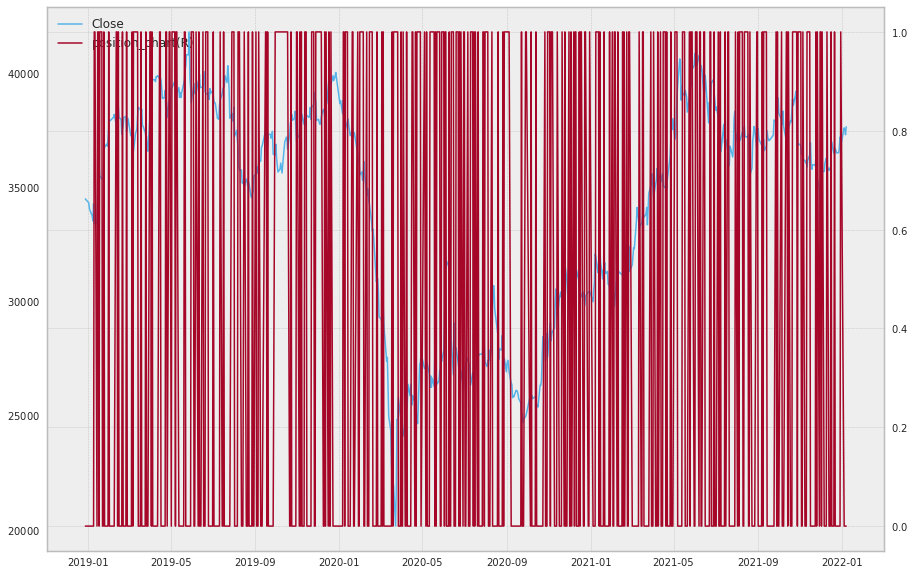

In [ ]:
draw_chart(m1_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m1_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,0.6154,zero,,0,1.00000,1.00000,1.000000,0.00,1.0000,1.0000
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,0.6538,zero,zz,0,1.00000,1.00000,1.000000,0.00,1.0000,1.0000
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,0.5000,zero,zz,0,1.00000,1.00000,1.000000,0.00,1.0000,0.9777
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,0.5769,zero,zz,0,1.00000,1.00000,1.000000,0.00,1.0000,0.9777
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,0.6154,zero,zz,0,1.00000,1.00000,1.000000,0.00,1.0000,0.9703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,0.5385,buy,zl,1,1.00000,1.00000,0.971475,-2.85,0.6373,0.7779
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,0.5000,zero,lz,0,1.00715,1.00715,0.978421,-2.16,0.6419,0.7853
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,0.5385,zero,zz,0,1.00000,1.00000,0.978421,-2.16,0.6419,0.7958


In [ ]:
# 무위험 수익률
fs.performance(m1_predictions, rf_rate=0.02)

CAGR: -0.72%
Accumulated return: -2.16%
Average return: 0.03%
Benchmark return : -4.73%
Number of trades: 168
Number of win: 76
Hit ratio: 45.24%
Investment period: 3.0yrs
Sharpe ratio: -0.11
MDD: -37.23%
Benchmark MDD: -52.84%


## m2

In [ ]:
m2_predictions['Label'] = m2_predictions['Label'].astype(float)

In [ ]:
m2_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0
mean,37621.744966,38035.838926,37216.107383,34260.228571,1.708178e+06,4.885261,0.032089,35963.696201,0.073826,32468.672608,...,15.628454,-60.197789,-162.348445,0.491275,0.489933,0.491275,0.491275,2.863087,0.491275,1.0
std,5609.387860,5591.672247,5623.193463,4786.633387,1.071023e+06,584.203928,1.930819,4423.606269,0.261662,5112.229421,...,611.776255,1790.973542,75.881033,0.500260,0.500234,0.500260,0.500260,2.197884,0.500260,0.0
min,22400.000000,23200.000000,21850.000000,20149.822266,3.831020e+05,-2586.800781,-9.390442,26335.096044,0.000000,19220.734020,...,-2779.788529,-8972.794118,-392.703993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33000.000000,33250.000000,32450.000000,30406.267578,9.949120e+05,-317.675781,-0.896287,32117.822818,0.000000,28737.064328,...,-249.934767,-1022.205882,-211.627006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,38550.000000,38850.000000,38200.000000,36124.457031,1.396877e+06,0.000000,0.000000,37857.123221,0.000000,34209.318192,...,115.593788,136.470588,-145.964748,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.0
75%,42550.000000,43000.000000,42150.000000,38007.832031,2.101338e+06,304.835938,0.910274,39330.138501,0.000000,36631.915734,...,330.230312,975.441176,-100.889210,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.0
max,47500.000000,48000.000000,46700.000000,41805.453125,7.289269e+06,3403.687500,14.196236,41505.035841,1.000000,38791.217681,...,1147.221089,4765.735294,-35.611389,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.0


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m2_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04    zero
2022-01-05    zero
2022-01-06     buy
2022-01-07     buy
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m2_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zl
2022-01-04    lz
2022-01-05    zz
2022-01-06    zl
2022-01-07    ll
Name: position, Length: 745, dtype: object

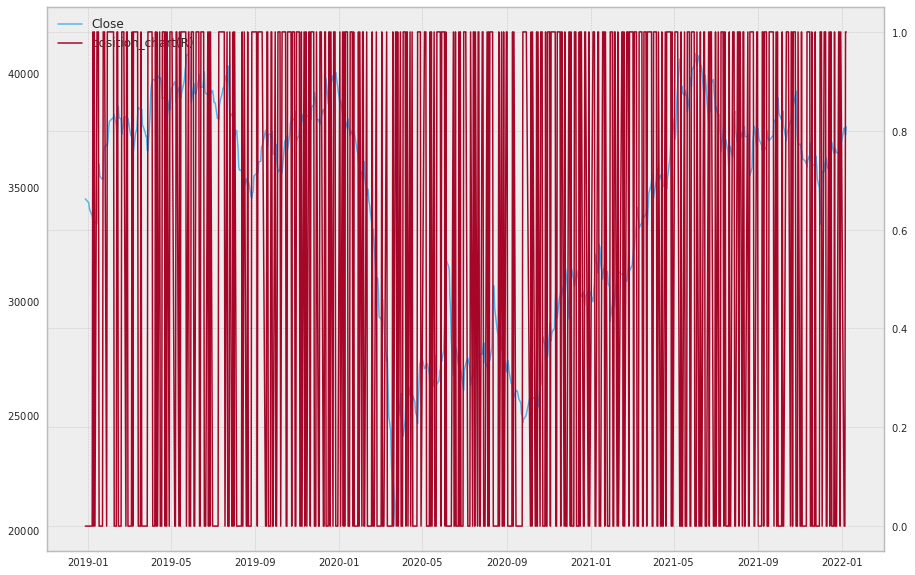

In [ ]:
draw_chart(m2_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m2_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,1.0,zero,,0,1.00000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,1.0,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,1.0,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9777
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,1.0,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9777
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,1.0,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,1.0,buy,zl,1,1.00000,1.000000,2.056395,105.64,0.9450,0.7779
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,1.0,zero,lz,0,1.00715,1.007150,2.071099,107.11,0.9517,0.7853
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,1.0,zero,zz,0,1.00000,1.000000,2.071099,107.11,0.9517,0.7958


In [ ]:
# 무위험 수익률
fs.performance(m2_predictions, rf_rate=0.02)

CAGR: 26.77%
Accumulated return: 105.18%
Average return: 0.42%
Benchmark return : -4.73%
Number of trades: 191
Number of win: 92
Hit ratio: 48.17%
Investment period: 3.0yrs
Sharpe ratio: 0.89
MDD: -22.30%
Benchmark MDD: -52.84%


## m3

In [ ]:
m3_predictions['Label'] = m3_predictions['Label'].astype(float)

In [ ]:
m3_predictions.describe()

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,macdsignal,awesome_oscillator,williams_r,upNdown,upNdown_1ago,upNdown_2ago,Target,cluster,Label,Score
count,745.000000,745.000000,745.000000,745.000000,7.450000e+02,745.000000,745.000000,745.000000,745.000000,745.000000,...,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,37621.744966,38035.838926,37216.107383,34260.228571,1.708178e+06,4.885261,0.032089,35963.696201,0.073826,32468.672608,...,15.628454,-60.197789,-162.348445,0.491275,0.489933,0.491275,0.491275,2.863087,0.487248,0.772247
std,5609.387860,5591.672247,5623.193463,4786.633387,1.071023e+06,584.203928,1.930819,4423.606269,0.261662,5112.229421,...,611.776255,1790.973542,75.881033,0.500260,0.500234,0.500260,0.500260,2.197884,0.500173,0.121538
min,22400.000000,23200.000000,21850.000000,20149.822266,3.831020e+05,-2586.800781,-9.390442,26335.096044,0.000000,19220.734020,...,-2779.788529,-8972.794118,-392.703993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500200
25%,33000.000000,33250.000000,32450.000000,30406.267578,9.949120e+05,-317.675781,-0.896287,32117.822818,0.000000,28737.064328,...,-249.934767,-1022.205882,-211.627006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.679700
50%,38550.000000,38850.000000,38200.000000,36124.457031,1.396877e+06,0.000000,0.000000,37857.123221,0.000000,34209.318192,...,115.593788,136.470588,-145.964748,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.794200
75%,42550.000000,43000.000000,42150.000000,38007.832031,2.101338e+06,304.835938,0.910274,39330.138501,0.000000,36631.915734,...,330.230312,975.441176,-100.889210,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.867500
max,47500.000000,48000.000000,46700.000000,41805.453125,7.289269e+06,3403.687500,14.196236,41505.035841,1.000000,38791.217681,...,1147.221089,4765.735294,-35.611389,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,0.988300


In [ ]:
#label 1일때 사고 0일 때 팔고
fs.indicator_to_signal(m3_predictions,factor='Label', buy=0.5, sell=0.5)

Date
2018-12-28    zero
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
              ... 
2021-12-30     buy
2022-01-04    zero
2022-01-05    zero
2022-01-06     buy
2022-01-07     buy
Name: trade, Length: 745, dtype: object

In [ ]:
fs.position(m3_predictions)

Date
2018-12-28      
2019-01-02    zz
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
              ..
2021-12-30    zl
2022-01-04    lz
2022-01-05    zz
2022-01-06    zl
2022-01-07    ll
Name: position, Length: 745, dtype: object

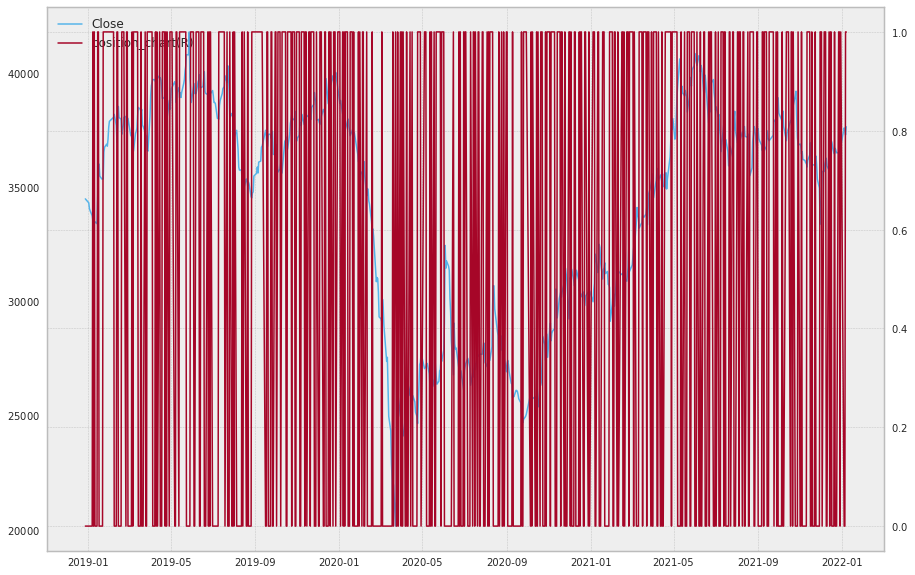

In [ ]:
draw_chart(m3_predictions, left=['Close'], right='position_chart')

In [ ]:
# 거래비용
fs.evaluate(m3_predictions, cost=0.0023)

,Open,High,Low,Close,Volume,Change,Change_rate,boll_HB,boll_HB_signal,boll_LB,...,Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-28,39150.0,39700.0,39100.0,34489.496094,849588,479.015625,1.408435,35439.319414,0.0,33013.389180,...,0.9596,zero,,0,1.00000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-02,40350.0,40350.0,39100.0,34315.312500,868545,-174.183594,-0.505034,35428.289610,0.0,33010.112343,...,0.8667,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,39450.0,39550.0,38900.0,34054.023438,885359,-261.289062,-0.761436,35357.228603,0.0,33003.101475,...,0.7148,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9777
2019-01-04,39450.0,39450.0,38650.0,33966.929688,827704,-87.093750,-0.255752,35187.252893,0.0,33044.477576,...,0.8092,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9777
2019-01-07,39150.0,39400.0,38650.0,33749.191406,743750,-217.738281,-0.641030,34959.287892,0.0,33113.705467,...,0.6556,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-30,36950.0,37250.0,36800.0,36800.000000,1306746,-400.000000,-1.075269,37207.365915,0.0,35422.678226,...,0.6278,buy,zl,1,1.00000,1.000000,1.415753,41.58,0.9450,0.7779
2022-01-04,37300.0,37600.0,37200.0,37600.000000,1128934,800.000000,2.173913,37416.488539,1.0,35404.518883,...,0.5310,zero,lz,0,1.00715,1.007150,1.425876,42.59,0.9517,0.7853
2022-01-05,37800.0,37950.0,37300.0,37500.000000,1473096,-100.000000,-0.265957,37555.944533,0.0,35446.026170,...,0.7904,zero,zz,0,1.00000,1.000000,1.425876,42.59,0.9517,0.7958


In [ ]:
# 무위험 수익률
fs.performance(m3_predictions, rf_rate=0.02)

CAGR: 12.08%
Accumulated return: 41.26%
Average return: 0.22%
Benchmark return : -4.73%
Number of trades: 183
Number of win: 87
Hit ratio: 47.54%
Investment period: 3.0yrs
Sharpe ratio: 0.42
MDD: -21.57%
Benchmark MDD: -52.84%
